In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

In [2]:
df = pd.read_csv("stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.shape

(5110, 12)

In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df.drop(columns=['id'],inplace=True)

In [7]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

### Which columns have missing values?

In [8]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
(df.isnull().mean()*100).round(2)

gender               0.00
age                  0.00
hypertension         0.00
heart_disease        0.00
ever_married         0.00
work_type            0.00
Residence_type       0.00
avg_glucose_level    0.00
bmi                  3.93
smoking_status       0.00
stroke               0.00
dtype: float64

Categorical Columns-->
These are either object or binary categorical:

- gender
- hypertension (0/1 → categorical in EDA)
- heart_disease (0/1 → categorical)
- ever_married
- work_type
- Residence_type
- smoking_status
- stroke (target, but categorical)

Numerical Columns-->
- age
- avg_glucose_level
- bmi

#### fill Missing values on bmi column

In [10]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [11]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

- now all none values are filled

### 3: Data Sanity Checks

In [12]:
(df['age'] < 0).sum()

np.int64(0)

- age cannot be -ve

In [13]:
(df['avg_glucose_level'] <= 0).sum()

np.int64(0)

- avg_glucose_level cannot be 0 or -ve

In [14]:
(df['bmi'] <= 0).sum()

np.int64(0)

- bmi cannot be 0 or -ve

### Check Binary Columns

In [15]:
binary_cols = ['hypertension', 'heart_disease', 'stroke']

for col in binary_cols:
    print(col, "unique values:", df[col].unique())


hypertension unique values: [0 1]
heart_disease unique values: [1 0]
stroke unique values: [1 0]


- Hence, all columns are consistent and making sence

### Categorical overview

In [16]:
cat_cols = [
    'gender', 'ever_married', 'work_type',
    'Residence_type', 'smoking_status']

for col in cat_cols:
    print("\n",col,"\n")
    print(df[col].value_counts(),"\n")
    print((df[col].value_counts(normalize=True)*100).round(2))



 gender 

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64 

gender
Female    58.59
Male      41.39
Other      0.02
Name: proportion, dtype: float64

 ever_married 

ever_married
Yes    3353
No     1757
Name: count, dtype: int64 

ever_married
Yes    65.62
No     34.38
Name: proportion, dtype: float64

 work_type 

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64 

work_type
Private          57.24
Self-employed    16.03
children         13.44
Govt_job         12.86
Never_worked      0.43
Name: proportion, dtype: float64

 Residence_type 

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64 

Residence_type
Urban    50.8
Rural    49.2
Name: proportion, dtype: float64

 smoking_status 

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64 

smoking_status
never sm

### Gender

- Majority of individuals in the dataset are female.
- Male participants form a slightly smaller proportion.
- The Other category has only one observation, indicating it is extremely rare.

### Married

- 65.6% of people in dataset are married
- 34.3% of people are not married
- Most individuals in the dataset have been married.
- Fewer individuals report never being married.
- This suggests the dataset contains a higher proportion of older adults.

### Work Type:

- Majority of the individual are working in a private sector.
- self employed and govt employed form smaller groups.
- very few individual fall under never worked category.
- Presence of children indicates inclusion of younger population.

### Residence Type

- The dataset is fairly balanced between Urban and Rural residents.
- No strong imbalance is observed in residence type.

#### Smoking status
- Majority of individuals have never smoked
- A significant portion has unknown smoking status
- Smokers form a smaller proportion

- Majority category: Never Smoked 
- Minority / rare category:unknown
- Any imbalance or data quality observation

#### Univariate EDA – Numerical Column

In [17]:
df['age'].describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

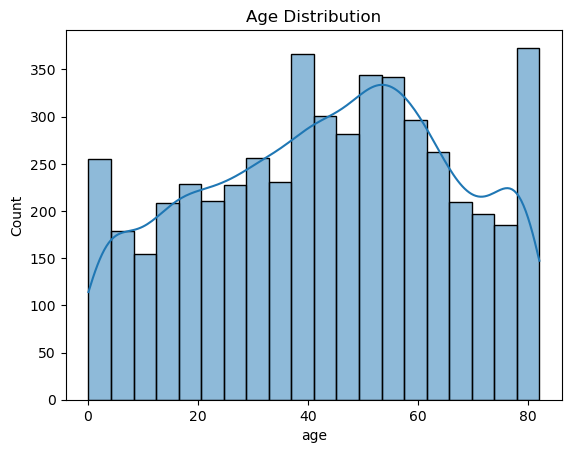

In [18]:
sns.histplot(df['age'],kde=True)
plt.title("Age Distribution")
plt.show()

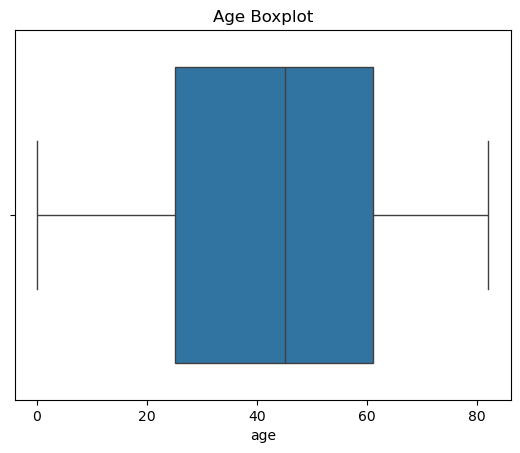

In [19]:
sns.boxplot(x=df['age'])
plt.title("Age Boxplot")
plt.show()

- most of the individual have age -->80
- Age is not normally distributed
- Presence of older population
- No impossible values

In [20]:
df['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

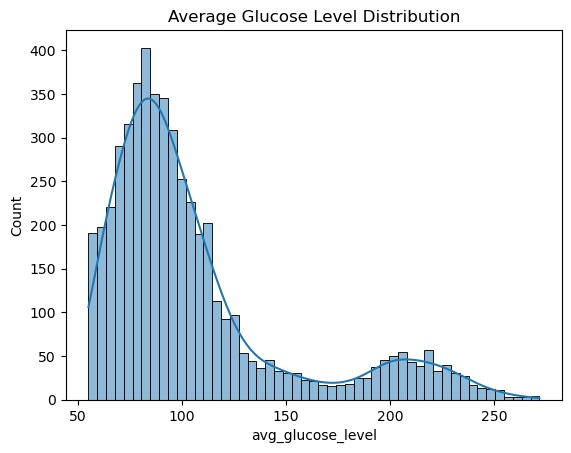

In [21]:
sns.histplot(df['avg_glucose_level'],kde=True)
plt.title("Average Glucose Level Distribution")
plt.show()

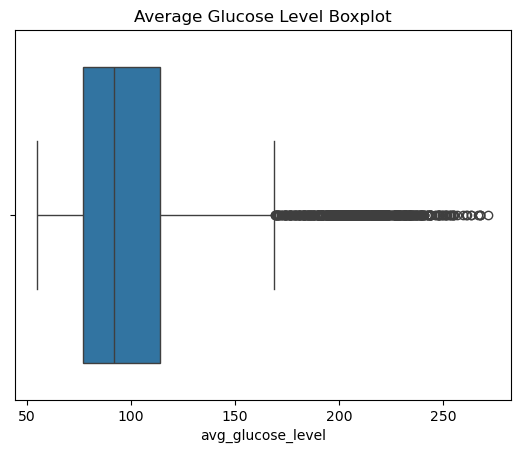

In [22]:
sns.boxplot(x = df['avg_glucose_level'])
plt.title("Average Glucose Level Boxplot")
plt.show()

- Average glucose level shows a right-skewed distribution.
- Presence of high glucose outliers indicates possible diabetic cases.
- Outliers are retained as they represent real medical conditions.

In [23]:
df['bmi'].describe()

count    5110.000000
mean       28.862035
std         7.699562
min        10.300000
25%        23.800000
50%        28.100000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

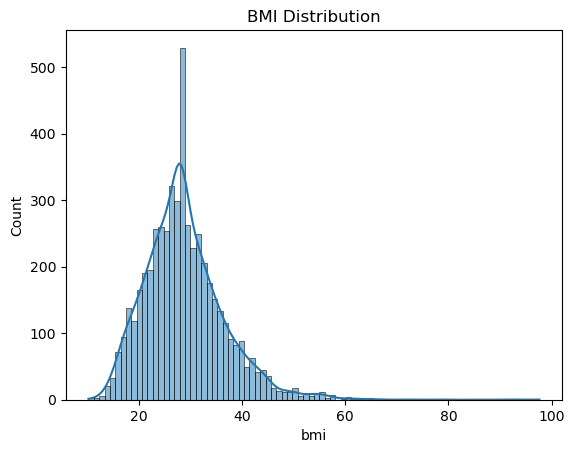

In [24]:
sns.histplot(df['bmi'],kde=True)
plt.title("BMI Distribution")
plt.show()

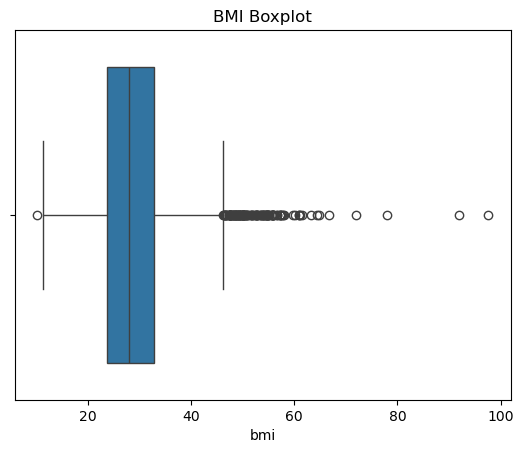

In [25]:
sns.boxplot(x = df['bmi'])
plt.title("BMI Boxplot")
plt.show()

- BMI distribution is positively skewed with multiple high-value outliers.
- High BMI values may indicate overweight or obese individuals.
- Outliers are retained to preserve real-world health variability.

### 5: Bivariate EDA

In [26]:
(df['stroke'].value_counts(normalize=True) * 100).round(2)

stroke
0    95.13
1     4.87
Name: proportion, dtype: float64

- The dataset is highly imbalanced.
- Stroke cases represent a small minority of the population.

### Stroke vs Age

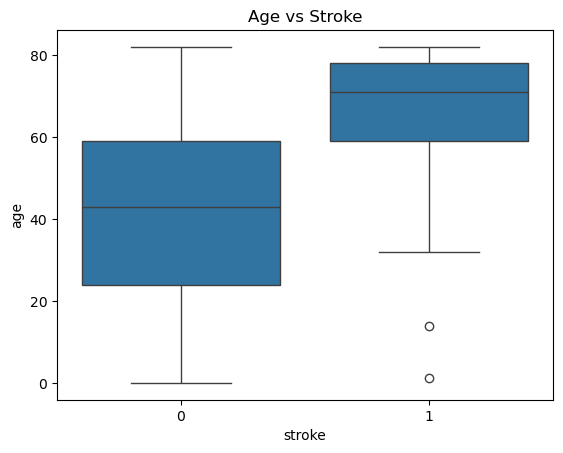

In [27]:
sns.boxplot(x ='stroke',y='age',data=df)
plt.title("Age vs Stroke")
plt.show()

- Stroke cases are concentrated among older individuals.
- Age shows a strong association with stroke occurrence.

### Stroke vs hypertension

In [28]:
(pd.crosstab(df['hypertension'], df['stroke'], normalize='index') * 100).round(2)

stroke,0,1
hypertension,,
0,96.03,3.97
1,86.75,13.25


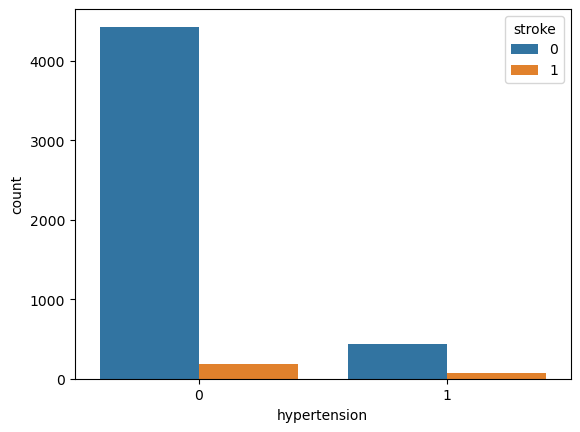

In [29]:
sns.countplot(x='hypertension',hue='stroke',data=df)
plt.show()

- Individuals with hypertension have a higher stroke rate.
- Hypertension is a significant risk factor.

### Stroke vs Heart Disease

In [30]:
pd.crosstab(df['heart_disease'],df['stroke'],normalize="index")*100

stroke,0,1
heart_disease,,
0,95.821266,4.178734
1,82.971014,17.028986


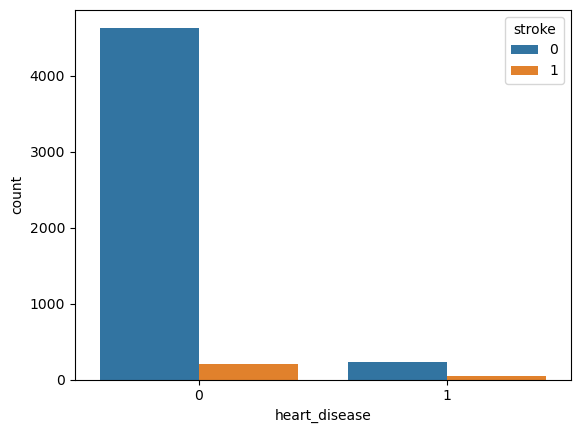

In [31]:
sns.countplot(x='heart_disease',hue='stroke',data=df)
plt.show()

- People with heart disease are about 4 times more likely to have had a stroke compared to those without heart disease:
- Stroke rate with heart disease: 17.03%
- Stroke rate without heart disease: 4.18%

### Stroke vs Average Glucose Level

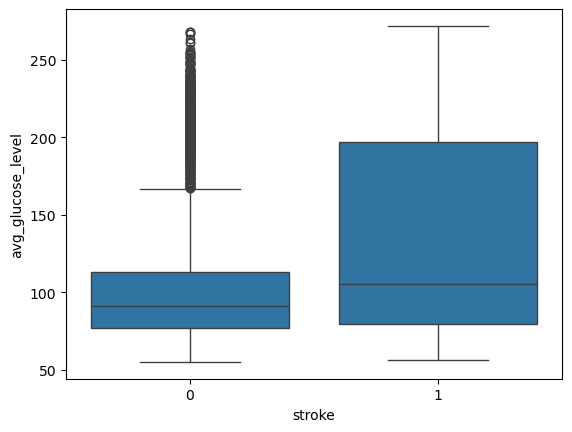

In [32]:
sns.boxplot(x = "stroke",y = "avg_glucose_level",data=df)
plt.show()

- stroke patients tend to have higher glucose levels
- suggests possible link with diabetes

### Stroke vs BMI

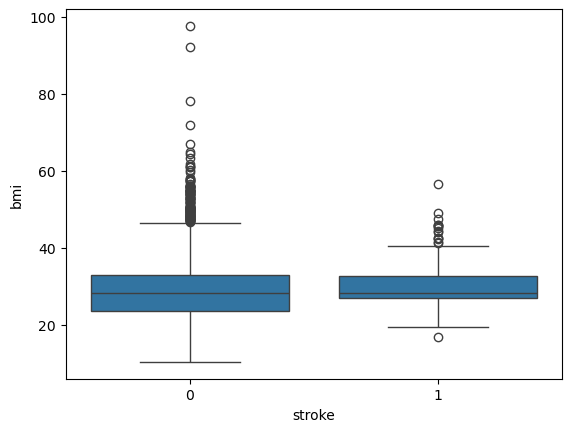

In [33]:
sns.boxplot(x='stroke',y='bmi',data=df)
plt.show()

- BMI distribution overlap significantly.
- BMI shows a weak to moderate association with stroke 

### Stroke vs Smoking status

In [34]:
pd.crosstab(df['smoking_status'],df['stroke'],normalize="index")*100

stroke,0,1
smoking_status,,
Unknown,96.955959,3.044041
formerly smoked,92.090395,7.909605
never smoked,95.243129,4.756871
smokes,94.676806,5.323194


- Former smokers and smokers show slightly higher stroke proportions.
- Large number of unknown smoking records may affect reliability.

In [35]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

#### Age, hypertension, and heart disease are the strongest factors associated with stroke, while glucose level shows moderate association. BMI and smoking status have weaker or less clear relationships.

### 🔑 1. Target Distribution (Important)

- The dataset is highly imbalanced.
- Stroke cases form a small minority compared to non-stroke cases.
- This imbalance must be considered in future modeling.

### 🔑 2. Age

- Stroke cases are concentrated among older individuals.
- Median age of stroke patients is significantly higher.
- Age is the strongest risk factor associated with stroke.

### 🔑 3. Hypertension

- Individuals with hypertension show a much higher stroke rate.
- Hypertension is a major contributing factor.

### 🔑 4. Heart Disease

- Stroke occurrence is notably higher among individuals with heart disease.
- Heart disease shows a strong association with stroke.

### 🔑 5. Average Glucose Level

- Stroke patients tend to have higher glucose levels.
- Indicates a possible link between diabetes and stroke.
- Shows moderate association.

### 🔑 6. BMI

- BMI distribution overlaps for stroke and non-stroke cases.
- BMI shows a weak to moderate association.
- Extreme BMI values are present but not decisive alone.

### 🔑 7. Smoking Status

- Former smokers and smokers show slightly higher stroke proportions.
- A large number of unknown smoking records limits reliability.
- Smoking status shows unclear or weak association.

#### 🧠 Overall Conclusion (MOST IMPORTANT)

Exploratory Data Analysis indicates that age, hypertension, and heart disease are the strongest factors associated with stroke occurrence. Average glucose level shows moderate influence, while BMI and smoking status exhibit weaker relationships. The dataset is highly imbalanced and suitable for predictive modeling with appropriate imbalance handling techniques.